## PREDICTING CARDIOVASCULAR DISEASE USING KNEIGHBORS CLASSIFIER 

### 1. Import libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier

### 2. Load the dataset using pandas

In [7]:
df=pd.read_csv('documents/card.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
age            1500 non-null int64
gender         1500 non-null int64
height         1500 non-null int64
weight         1500 non-null float64
ap_hi          1500 non-null int64
ap_lo          1500 non-null int64
cholesterol    1500 non-null int64
gluc           1500 non-null int64
smoke          1500 non-null int64
alco           1500 non-null int64
active         1500 non-null int64
cardio         1500 non-null int64
dtypes: float64(1), int64(11)
memory usage: 140.7 KB


In [9]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,19425.466667,1.366667,164.455333,74.629533,126.766667,92.504000,1.393333,1.244000,0.091333,0.052667,0.783333,0.496000
std,2513.921717,0.482055,8.207857,15.066064,17.554230,101.536925,0.701629,0.590505,0.288179,0.223442,0.412111,0.500151
min,14307.000000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17539.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19666.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21305.500000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23661.000000,2.000000,198.000000,200.000000,220.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 3. Data Preprocessing(No missing values)

In [21]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### 4. Correlation matrix

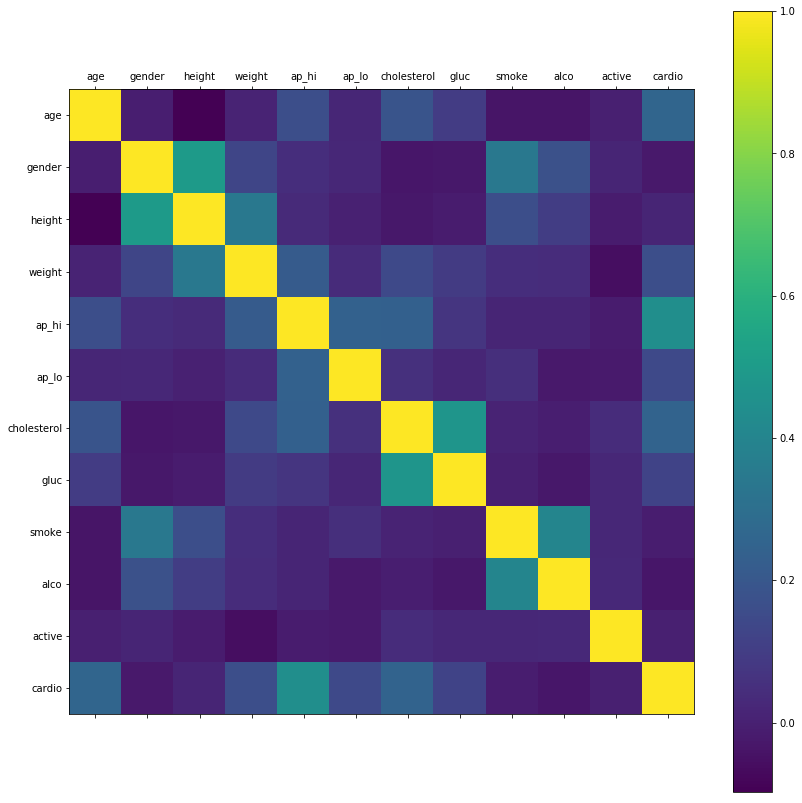

In [10]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

### 5. Counts of each target class

Text(0.5, 1.0, 'Count of each Target Class')

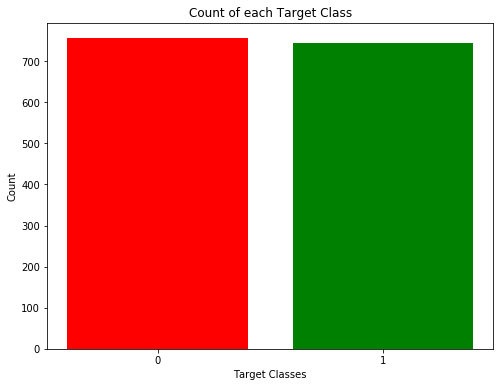

In [12]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['cardio'].unique(), df['cardio'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### 6. Split the data into train and test using sklearn

In [15]:
y = df['cardio']
X = df.drop(['cardio'], axis = 1)a
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 7. Fit the model using KNeighbors classifier

In [16]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

#### plotting the graph

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

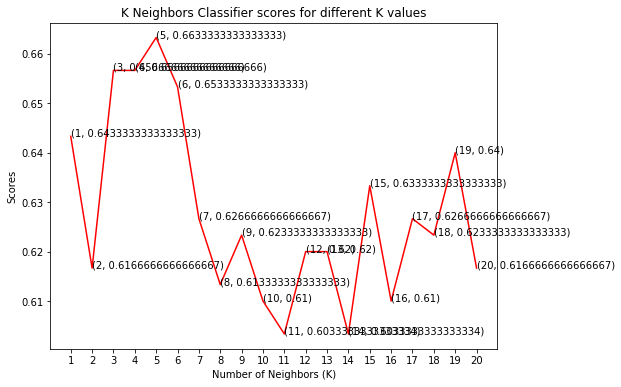

In [17]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')1
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

###  8. Predict targets for test dataset

In [26]:
y_pred = knn_classifier.predict(X_test)

In [27]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("precision:",metrics.precision_score(y_test,y_pred))
print("recall:",metrics.recall_score(y_test,y_pred))

accuracy: 0.6166666666666667
precision: 0.6549295774647887
recall: 0.5849056603773585


### 9. Describing the performance of model using confusion matrix

In [30]:
cm=confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[92, 49],
       [66, 93]], dtype=int64)

### 10. Prediction on new features

In [32]:
a=knn_classifier.predict([[17581,1,154,59,90,60,1,1,0,0,1]])

In [33]:
a

array([0], dtype=int64)

In [34]:
if(a==1):
    print("person is having cardivascular disease!!!")
else:
    print("person is not having cardivascular disease!!!")

person is not having cardivascular disease!!!
